In [147]:
%matplotlib inline

In [290]:
from __future__ import division
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import poisson_test

mean, var, skew, kurt 5.0 5.0 0.4472135955 0.2


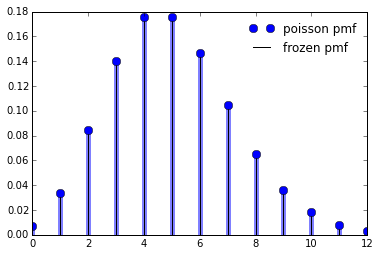

In [149]:
mu = 5

mean, var, skew, kurt = scs.poisson.stats(mu, moments='mvsk')
print "mean, var, skew, kurt", mean, var, skew, kurt

fig, ax = plt.subplots(1, 1)
x = np.arange(scs.poisson.ppf(0.001, mu),
              scs.poisson.ppf(0.999, mu))
ax.plot(x, scs.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')

ax.vlines(x, 0, scs.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
rv = scs.poisson(mu)

ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

mean, var, skew, kurt 1.0 1.0 2.0 6.0
Accurate: True


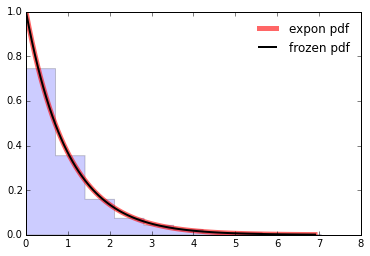

In [150]:
mean, var, skew, kurt = scs.expon.stats(moments='mvsk')
print "mean, var, skew, kurt", mean, var, skew, kurt

fig, ax = plt.subplots(1, 1)
x = np.linspace(scs.expon.ppf(0.001),
                scs.expon.ppf(0.999), 100)
ax.plot(x, scs.expon.pdf(x),
       'r-', lw=5, alpha=0.6, label='expon pdf')

rv = scs.expon()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = expon.ppf([0.001, 0.5, 0.999])
print 'Accurate:', np.allclose([0.001, 0.5, 0.999], expon.cdf(vals))

r = scs.expon.rvs(size=1000)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [270]:
mu = 0.6  # average rate per time interval
K = 1000  # time intervals, could be days

burst_amplitude = 2
burst_duration = int(K/30)
burst_start = int(K/2)

# first Poissonian noise
t1 = np.full((int(mu*K),), np.nan)
N1 = scs.poisson.rvs(mu, size=K)

# second, Poissonian with a Poissonian burst
t2 = np.full((int(mu*K),), np.nan)
N2 = scs.poisson.rvs(mu, size=K)
N2[burst_start + np.arange(burst_duration)] = scs.poisson.rvs(burst_amplitude*mu, size=burst_duration)

# third, uniformly distributed times
t3 = K*np.random.random(int(mu*K))
N3 = np.histogram(t3, bins=K, range=(0, K))[0]

# fourth, exponentially distributed wait times
t4 = 1/mu*np.random.exponential(1, 2*int(mu*K)).cumsum()
t4 = t4[t4 < K]
N4 = np.histogram(t4, bins=K, range=(0, K))[0]

# fifth, exponentially distributed wait times, with a changing rate
def wait_time(t):
    wait = 1/mu
    if (t >= burst_start) and (t < burst_start + burst_duration):
        wait /= (1 + burst_amplitude)
    return wait
t5 = [0]
while t5[-1] < K:
    t5 += [t5[-1] + np.random.exponential(wait_time(t5[-1]))]
t5 = t5[:-1]
N5 = np.histogram(t5, bins=K, range=(0, K))[0]

t = [t1, t2, t3, t4, t5]
N = np.vstack((N1, N2, N3, N4, N5))

labels = ['Poisson', 'Poisson burst', 'uniform', 'exponential wait', 'exponential burst']

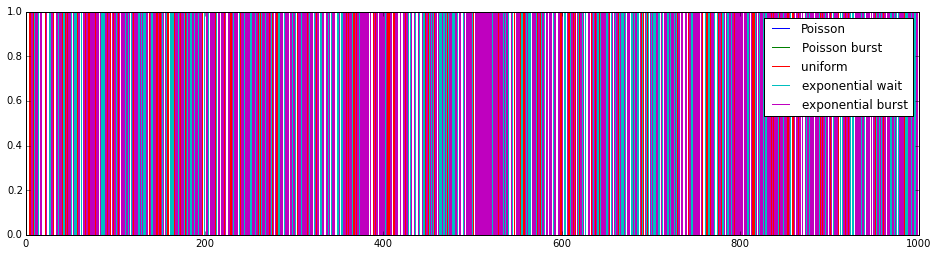

In [271]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
for times, label in zip(t, labels):
    plt.vlines(times, np.zeros_like(times), np.ones_like(times), label=label, color=next(ax._get_lines.color_cycle))
plt.legend();

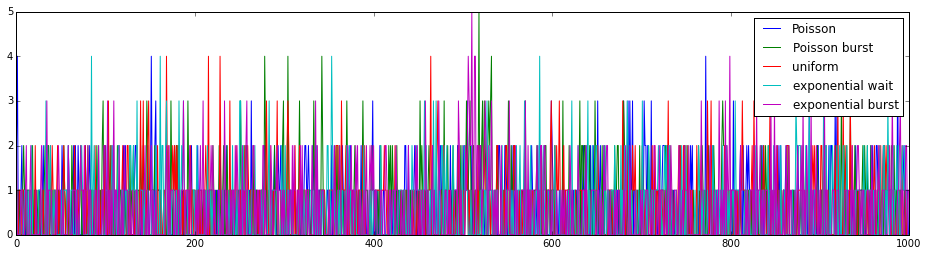

In [272]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
for row, label in zip(N, labels):
    plt.plot(row, label=label)
plt.legend();

In [291]:
p_DT = [poisson_test.dispersion(row) for row in N]

X_mean, chi_squared, p-value: 0.597, 1019.42, 0.32
X_mean, chi_squared, p-value: 0.679, 1004.36, 0.45
X_mean, chi_squared, p-value: 0.6, 1026.67, 0.26
X_mean, chi_squared, p-value: 0.583, 1075.66, 0.046
X_mean, chi_squared, p-value: 0.658, 1031.97, 0.23


In [293]:
p_BZ = [poisson_test.brown_zhao(row) for row in N]

Y_mean, chi_squared, p-value: 0.915015, 538.991, 1
Y_mean, chi_squared, p-value: 0.953885, 576.416, 1
Y_mean, chi_squared, p-value: 0.916644, 539.054, 1
Y_mean, chi_squared, p-value: 0.906353, 546.095, 1
Y_mean, chi_squared, p-value: 0.943078, 574.412, 1


In [289]:
chi_squared = 4*sum((Y - Y_mean)**2)
print chi_squared

538.991090235


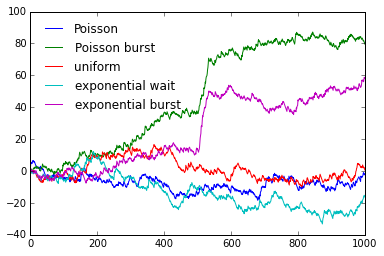

In [277]:
for row, label in zip(N, labels):
    plt.plot(np.cumsum(row) - mu*np.arange(K), label=label)
plt.legend(loc='upper left', frameon=False);

In [294]:
p_KSE = [poisson_test.kolmogorov_smirnov(times, 'expon') for times in t]
print
p_KSU = [poisson_test.kolmogorov_smirnov(times, 'uniform') for times in t]
print
p_KST = [poisson_test.kolmogorov_smirnov(times, 'triang') for times in t]

mean wait, statistic, p-value: nan, nan, nan
mean wait, statistic, p-value: nan, nan, nan
mean wait, statistic, p-value: -0.686125, 0.504174, 0
mean wait, statistic, p-value: 1.71301, 0.0402749, 0.29
mean wait, statistic, p-value: 1.52204, 0.02263, 0.89

mean wait, statistic, p-value: nan, nan, nan
mean wait, statistic, p-value: nan, nan, nan
mean wait, statistic, p-value: 1.66157, 1, 0
mean wait, statistic, p-value: 1.7106, 0.998285, 0
mean wait, statistic, p-value: 1.51973, 0.99696, 0

mean wait, statistic, p-value: nan, nan, nan
mean wait, statistic, p-value: nan, nan, nan
mean wait, statistic, p-value: 1.66157, 1, 0
mean wait, statistic, p-value: 1.7106, 0.998285, 0
mean wait, statistic, p-value: 1.51973, 0.99696, 0


In [295]:
# using Fisher's method to combine the results works really well!
p_combined = [scs.combine_pvalues(row)[1] for row in np.vstack((p_KSE, p_DT)).T]
p_combined

[nan, nan, 0.0, 0.071502579159202898, 0.52680414602090231]

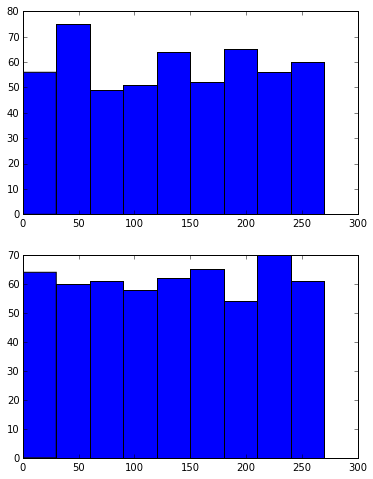

In [280]:
mean_wait = np.max(t4)/float(len(t4))
mean_wait
_, axes = plt.subplots(2, 1, figsize=(6, 8))
bins = np.arange(0, 300, 30)
axes[0].hist(t4/mean_wait/2, bins)
axes[1].hist(np.random.rand(len(t4)).cumsum(), bins);

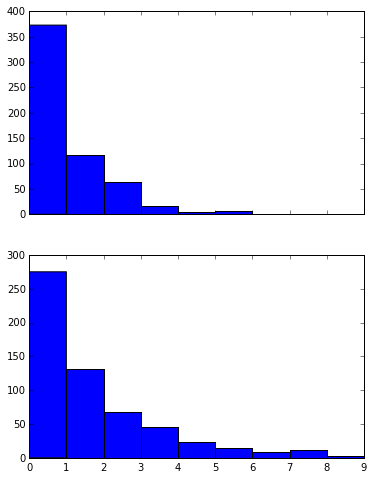

In [281]:
mean_wait = np.max(t4)/float(len(t4))
mean_wait
_, axes = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
axes[0].hist(np.diff(t4)/mean_wait, np.arange(10))
axes[1].hist(np.random.exponential(mean_wait, len(t4)), np.arange(10));